In [44]:
from src.models import Video
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

videos = Video.select().where((Video.duration_seconds > 60) & (Video.origin == Video.Origin.SCRAPED.value))
videos.count()

26973

In [ ]:
channel_uploads = {}

for x in videos:
    assert isinstance(x, Video)
    if x.channel_id not in channel_uploads:
        channel_uploads[x.channel_id] = {
            "channel_id": x.channel_id, 
            "upload_times": None,
            "label": x.label,
        }
    if channel_uploads[x.channel_id]["upload_times"] is None:
        channel_uploads[x.channel_id]["upload_times"] = [x.published_at]
    else:
        channel_uploads[x.channel_id]["upload_times"].append(x.published_at)

len(channel_uploads)

493

### Column ideas:
1. [ ] 24 hour in a day buckets and drop videos into those buckets. Maybe this adds 24 columns?
2. [ ] Time between uploads variance.
3. [x] Average time between uploads.

In [47]:
for channel in channel_uploads.values():
    uploads = sorted(channel["upload_times"])
    deltas = [
        (uploads[i+1] - uploads[i]).total_seconds()
        for i in range(len(uploads) - 1)
    ]
    avg_seconds = sum(deltas) / len(deltas) if len(deltas) != 0 else None
    channel["time_between_uploads"] = deltas
    channel["avg_time_between_uploads"] = avg_seconds
    channel["var_time_between_uploads"] = np.var(deltas)

df = pd.DataFrame(channel_uploads.values())
df

/home/dodo/Documents/github/i-hate-ai-music-on-youtube/.venv/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:4232: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/dodo/Documents/github/i-hate-ai-music-on-youtube/.venv/lib/python3.12/site-packages/numpy/_core/_methods.py:178: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/dodo/Documents/github/i-hate-ai-music-on-youtube/.venv/lib/python3.12/site-packages/numpy/_core/_methods.py:211: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


,channel_id,upload_times,label,avg_time_between_uploads,time_between_uploads,var_time_between_uploads
0,UCSZb7usBiGMRlUxveUdAM4w,"[2024-12-09 15:01:09, 2024-12-08 15:00:54, 202...",ai,1.610353e+05,"[261838.0, 256518.0, 259192.0, 259224.0, 86425...",1.451065e+11
1,UCQpgrhmtpGcTvgpmj3R5j1Q,"[2022-02-20 14:33:05, 2022-06-28 10:40:34, 202...",ai,2.165595e+06,"[12666.0, 170784.0, 85981.0, 518722.0, 4664131...",9.434147e+13
2,UCSQRu84pU1I4-sGXOQHmFWg,"[2025-04-17 07:23:10, 2025-04-15 05:27:57, 202...",ai,5.004269e+05,"[56684.0, 42731.0, 49365.0, 16337.0, 1378.0, 1...",1.816407e+12
3,UCSUouuLW-trlzZHIIvWHbeg,"[2025-12-25 09:31:31, 2026-01-08 11:33:17, 202...",ai,1.352054e+05,"[79135.0, 84479.0, 83105.0, 91515.0, 92990.0, ...",9.582658e+09
4,UCRJWp1zSusWTtx5NuDROUug,"[2024-12-19 16:31:11, 2024-12-18 03:14:45, 202...",ai,6.348515e+05,"[50762.0, 33763.0, 53964.0, 213206.0, 78394.0,...",2.502661e+12
...,...,...,...,...,...,...
488,UCT7fKATgW0pqiIzdDWCbErQ,"[2025-12-31 00:01:22, 2026-01-13 00:00:04, 202...",ai,1.096982e+05,"[86399.0, 86402.0, 86351.0, 86438.0, 259152.0,...",2.794373e+09
489,UCT0ev_xAEMHaYy-SkGWzORQ,"[2025-02-13 04:45:01, 2025-02-10 19:39:49, 202...",ai,1.085995e+06,"[3624193.0, 207.0, 359838.0, 840074.0, 176341....",1.646782e+12
490,UCSthfM__-som_meovwac6XA,"[2026-01-12 06:58:39, 2026-01-12 06:50:48, 202...",ai,2.731293e+04,"[78.0, 183.0, 201.0, 70.0, 129.0, 96.0, 226.0,...",4.560973e+09
491,UCSZmbk4FCyYszzHdIBRKONg,"[2025-12-15 21:48:57, 2025-12-22 08:25:44, 202...",ai,6.856370e+04,"[43176.0, 43225.0, 43197.0, 43226.0, 43167.0, ...",9.982615e+09


ValueError: x and y must have same first dimension, but have shapes (493,) and (5,)

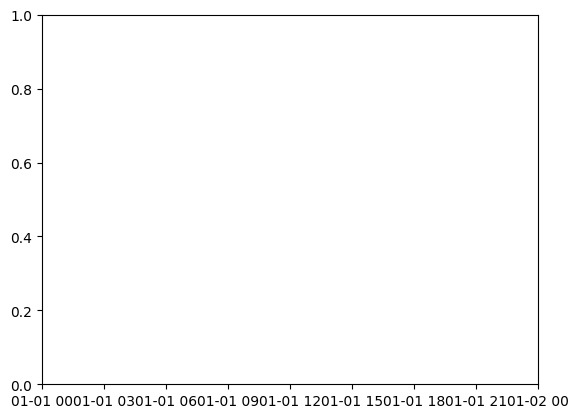

In [43]:
x = [0, 1, 2, 3, 4]
y = [0, 1, 4, 9, 16]

# Create plot
plt.plot(df["upload_times"], y)

# Labels
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.title("Simple 2D Plot")

# Show
plt.show()